# EVALUATING  CUSTOMER LIFE TIME VALUE (CLV) USING INSURANCE DATA

In [220]:
### import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import xgboost
from sklearn.model_selection import train_test_split



In [221]:
### read data
df = pd.read_csv('train.csv')
print(df.shape, '\n')
print(df.head())


(9806, 22) 

   CustomerID  Customer.Lifetime.Value Coverage             Education  \
0        5917              7824.372789    Basic              Bachelor   
1        2057              8005.964669    Basic               College   
2        4119              8646.504109    Basic  High School or Below   
3        1801              9294.088719    Basic               College   
4        9618              5595.971365    Basic              Bachelor   

  EmploymentStatus Gender Income Location.Geo Location.Code Marital.Status  \
0       Unemployed      F      0    17.7,77.7         Urban        Married   
1         Employed      M  63357    28.8,76.6      Suburban        Married   
2         Employed      F  64125    21.6,88.4         Urban        Married   
3         Employed      M  67544      19,72.5      Suburban        Married   
4          Retired      F  19651    19.1,74.7      Suburban        Married   

   ...  Months.Since.Policy.Inception  Number.of.Open.Complaints  \
0  ...     

In [222]:
print(df.info(), '\n')
print(df.describe(), '\n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9806 entries, 0 to 9805
Data columns (total 22 columns):
CustomerID                       9806 non-null int64
Customer.Lifetime.Value          9806 non-null float64
Coverage                         8881 non-null object
Education                        9677 non-null object
EmploymentStatus                 9688 non-null object
Gender                           9677 non-null object
Income                           9806 non-null object
Location.Geo                     9806 non-null object
Location.Code                    9687 non-null object
Marital.Status                   9677 non-null object
Monthly.Premium.Auto             9012 non-null float64
Months.Since.Last.Claim          9806 non-null int64
Months.Since.Policy.Inception    9806 non-null int64
Number.of.Open.Complaints        8988 non-null float64
Number.of.Policies               9685 non-null float64
Policy.Type                      8915 non-null object
Policy                      

In [223]:
df.columns

Index(['CustomerID', 'Customer.Lifetime.Value', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location.Geo', 'Location.Code',
       'Marital.Status', 'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Total.Claim.Amount', 'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

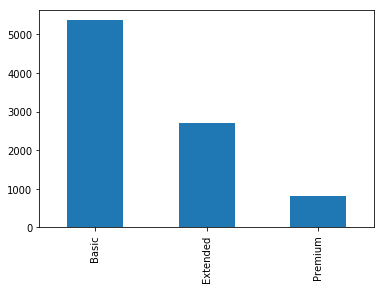

In [224]:
### Basic Exploratory data analysis

df['Coverage'].value_counts().plot('bar')


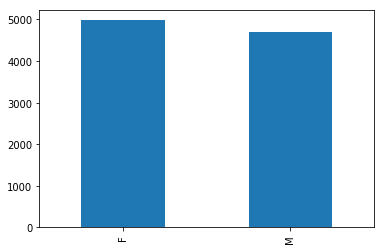

In [225]:
df['Gender'].value_counts().plot('bar')

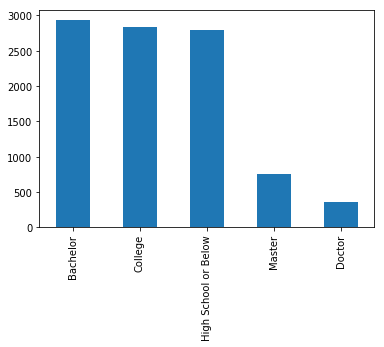

In [226]:
df['Education'].value_counts().plot('bar')

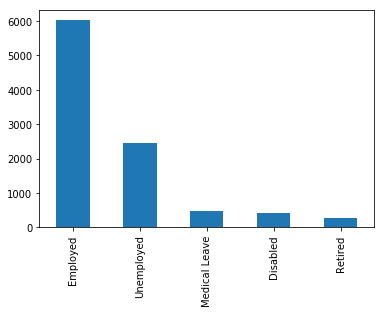

In [227]:
df['EmploymentStatus'].value_counts().plot('bar')

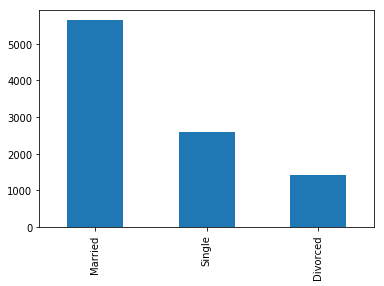

In [228]:
df['Marital.Status'].value_counts().plot('bar')

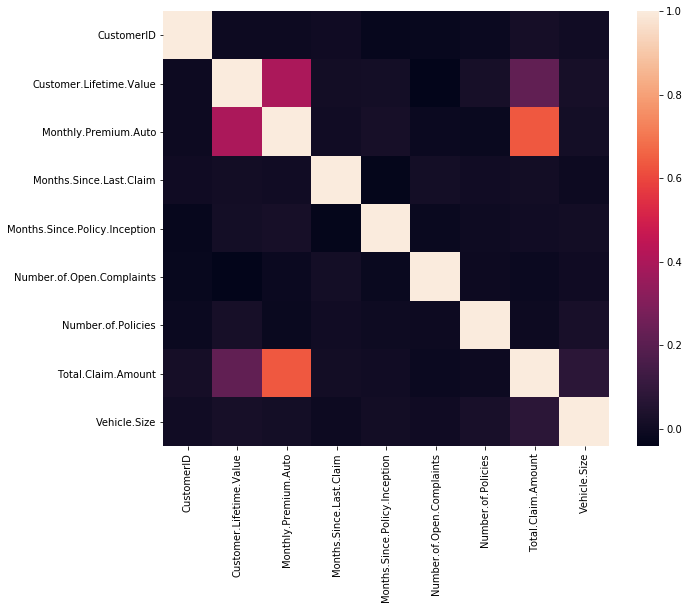

In [229]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
sns.heatmap(df.corr())

# from heat map we can see that customer.lifetime value is correlated to total claim amount monthly premium auto which are close to 0.5 

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


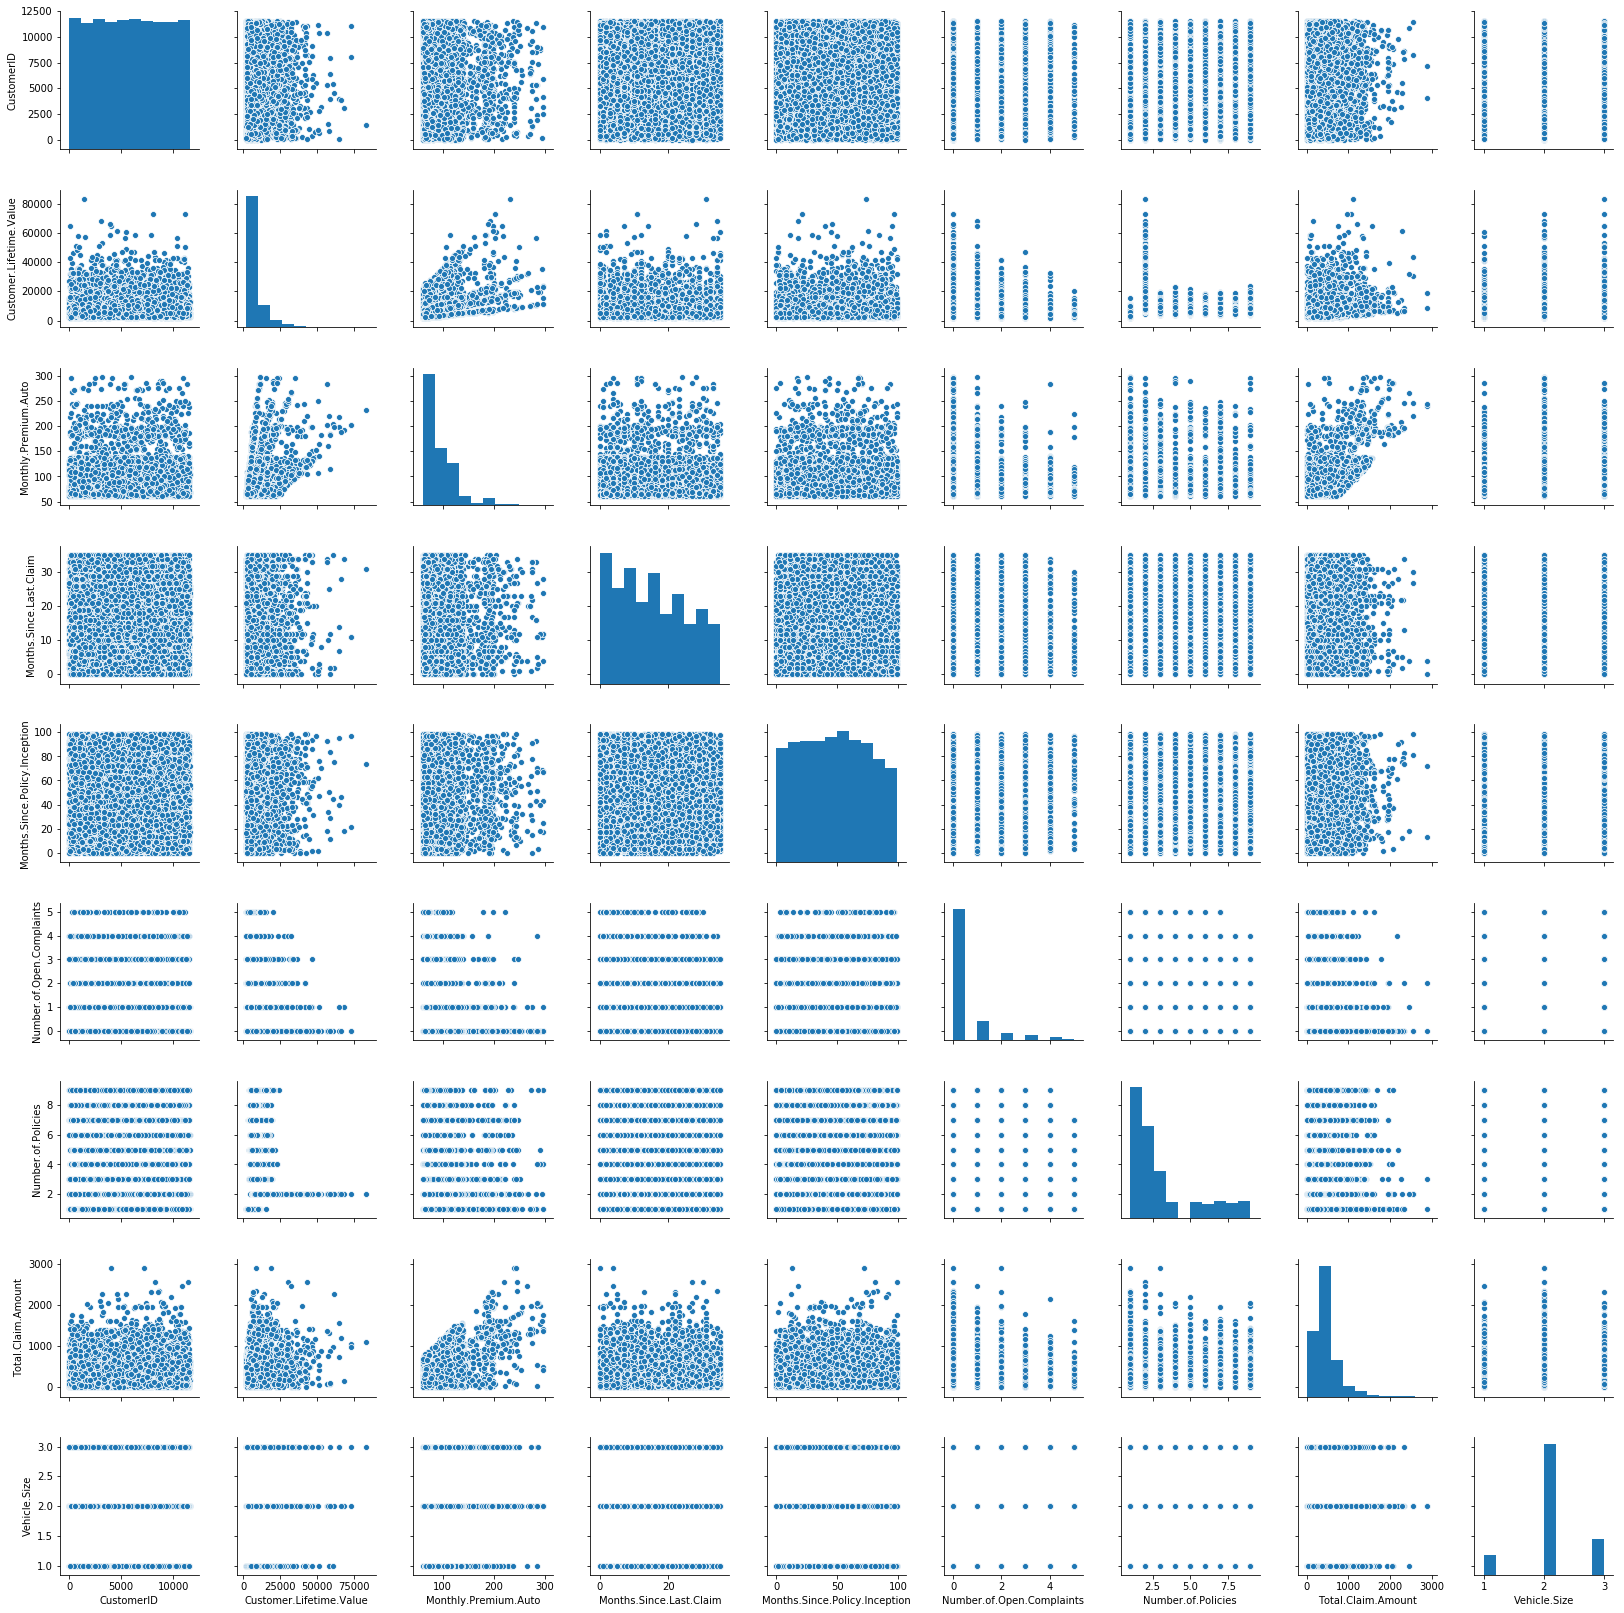

In [230]:
sns.pairplot(df)

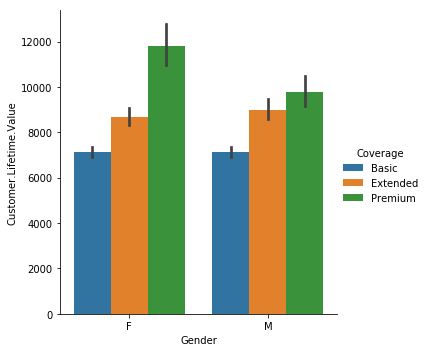

In [232]:
sns.catplot(x="Gender", y="Customer.Lifetime.Value", hue="Coverage", kind="bar", data=df);


# from above fig it is clear that customer life time value is more for premium members and extended members which makes sense and customer value is more for females compared to male for premium members.

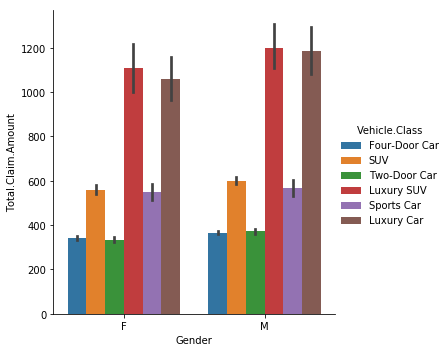

In [233]:
sns.catplot(x="Gender", y="Total.Claim.Amount", hue="Vehicle.Class", kind="bar", data=df);


# from above plot it is evdient that luxury cars have higher claim amount as they more comapred to other vechile class in general

In [258]:
### lets do some more data exploration like missing values imputation
df['Coverage'].isnull().value_counts()

False    9806
Name: Coverage, dtype: int64

In [259]:
df['Coverage'].fillna(df['Coverage'].mode()[0], inplace = True)
print(df['Coverage'].value_counts())
print(df['Coverage'].isnull().value_counts())

Basic       6286
Extended    2697
Premium      823
Name: Coverage, dtype: int64
False    9806
Name: Coverage, dtype: int64


In [260]:
df['Policy.Type'].isnull().value_counts()

False    9806
Name: Policy.Type, dtype: int64

In [261]:
df['Policy.Type'].fillna(df['Policy.Type'].mode()[0], inplace = True)
df['Policy.Type'].value_counts()

Personal Auto     7511
Corporate Auto    1920
Special Auto       375
Name: Policy.Type, dtype: int64

In [262]:
df['Number.of.Policies'].isnull().value_counts()

False    9806
Name: Number.of.Policies, dtype: int64

In [263]:
df['Number.of.Policies'].fillna(df['Number.of.Policies'].mean(), inplace = True)
df['Number.of.Policies'].isnull().value_counts()

False    9806
Name: Number.of.Policies, dtype: int64

In [264]:
df['Monthly.Premium.Auto'].isnull().value_counts()

False    9806
Name: Monthly.Premium.Auto, dtype: int64

In [265]:
df['Monthly.Premium.Auto'].fillna(df['Monthly.Premium.Auto'].mean(), inplace = True)
df['Monthly.Premium.Auto'].isnull().value_counts()

False    9806
Name: Monthly.Premium.Auto, dtype: int64

In [266]:
df['Months.Since.Policy.Inception'].isnull().value_counts()


False    9806
Name: Months.Since.Policy.Inception, dtype: int64

In [267]:
df['Policy'].isnull().value_counts()


False    9806
Name: Policy, dtype: int64

In [268]:
df['Policy'].fillna(df['Policy'].mode()[0] , inplace = True)
df['Policy'].isnull().value_counts()

False    9806
Name: Policy, dtype: int64

In [269]:
df['Vehicle.Class'].fillna(df['Vehicle.Class'].mode()[0], inplace = True)
df['Vehicle.Class'].isnull().value_counts()

False    9806
Name: Vehicle.Class, dtype: int64

In [270]:
df['EmploymentStatus'].fillna(df['EmploymentStatus'].mode()[0], inplace=True)
df['Education'].fillna(df['Education'].mode()[0], inplace = True)



In [271]:
### feature engineering
df['Policy_value'] = df['Months.Since.Policy.Inception'] * df['Monthly.Premium.Auto']
df['Policy_value'].describe()


count     9806.000000
mean      4515.355563
std       3221.043630
min          0.000000
25%       2074.250000
50%       4140.000000
75%       6216.000000
max      26319.000000
Name: Policy_value, dtype: float64

In [272]:
df['Income'] = df['Income'].replace('?', 0)

In [340]:
### convert text to numeric data
from sklearn.preprocessing import OneHotEncoder

onh = OneHotEncoder()


df2 = df[['Coverage','EmploymentStatus','Gender','Policy.Type','Vehicle.Class']]




char_cols = df2.dtypes.pipe(lambda x: x[x == 'object']).index

for c in char_cols:
    df2[c] = onh.fit_transform(df[c])
    
df2.head()
      

,Coverage,EmploymentStatus,Gender,Policy.Type,Vehicle.Class
0,0,0,0,0,0
1,0,1,1,0,1
2,0,1,0,0,1
3,0,1,1,1,1
4,0,2,0,0,2


In [392]:
### select X and y features

x = df[['Income', 'Total.Claim.Amount', 'Policy_value', 'Number.of.Policies']]

X = pd.concat([x, df2], axis=1)
inp_feat = X
y = df[['Customer.Lifetime.Value']]

print(X.head(), '\n')
print(y.head())

   Income  Total.Claim.Amount  Policy_value  Number.of.Policies  Coverage  \
0       0          267.214383        2211.0                 2.0         0   
1       1          565.508572        4242.0                 5.0         0   
2       2          369.818708        4752.0                 3.0         0   
3       3          556.800000        1740.0                 3.0         0   
4       4          345.600000        4896.0                 5.0         0   

   EmploymentStatus  Gender  Policy.Type  Vehicle.Class  
0                 0       0            0              0  
1                 1       1            0              1  
2                 1       0            0              1  
3                 1       1            1              1  
4                 2       0            0              2   

   Customer.Lifetime.Value
0              7824.372789
1              8005.964669
2              8646.504109
3              9294.088719
4              5595.971365


In [351]:
print(X.shape, y.shape)


(9806, 9) (9806, 1)


In [389]:
### scaling the features as we can see the some input features are in 1000's and some in 1's and 0's

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)




In [353]:
#### test train slipt

X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)




In [381]:
### ensemble model Random Forest
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor()

RF.fit(X_train, y_train)

y_pred_2 = RF.predict(X_test)

print(y_pred[:10], '\n')

print(r2_score(y_pred_2, y_test))

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[[ 5930.2971942 ]
 [ 8139.2928636 ]
 [14591.77121201]
 [ 7406.92814205]
 [ 6900.26872518]
 [ 6821.27927344]
 [ 6439.14699372]
 [ 5881.48341602]
 [ 6900.77713639]
 [ 7725.55437579]] 

0.5213431635008898


In [396]:
### lets look at features importance
feature_importances = pd.DataFrame(RF.feature_importances_,index = inp_feat.columns,
                                  columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Number.of.Policies,0.458171
Policy_value,0.148128
Vehicle.Class,0.128214
Total.Claim.Amount,0.114772
Income,0.069378
Coverage,0.035474
Gender,0.017553
EmploymentStatus,0.015420
Policy.Type,0.012890


In [399]:
### using XGBoost regression

xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print(y_pred[:10])

r2_score(y_test, y_pred)

[00:01:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19190.309  15547.375  16660.494   3394.5999 24098.16    5356.927
 11151.242   2581.3164  2738.9033  4961.41  ]


0.6469337660104286

In [398]:
feature_importances = pd.DataFrame(xgb.feature_importances_,index = inp_feat.columns,
                                  columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Number.of.Policies,0.600823
Vehicle.Class,0.129364
Policy_value,0.058843
Coverage,0.047342
Total.Claim.Amount,0.039841
Policy.Type,0.036892
Gender,0.031241
Income,0.030942
EmploymentStatus,0.024713
